# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Imports the k-means algorithm from scikit-learn.
import pylab as pl # A convenience module that bulk imports matplotlib.

# 02. Downloading and preparing the data for clustering

In [2]:
path = r'C:\Users\ideal\OneDrive\Desktop\CF Tasks\Advanced Analytics & Dashboards Design'

In [3]:
# Downloading the full merged Brazilian E-commerce dataset
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ecommerce_final_merge.pkl'))

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [6]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
# Drop duplicates
df.drop_duplicates()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18079635,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,83750.0,-25.760605,-49.730156,lapa,PR,14407.0,franca,SP,1.0,debit_card,1.0,86.86,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,health_beauty
18079636,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018

In [8]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP,9350.0,maua,SP,2.0,voucher,1.0,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,1.0,credit_card,1.0,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.578333,-46.587123,sao paulo,SP,9350.0,maua,SP,3.0,voucher,1.0,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18079641 entries, 0 to 18079640
Data columns (total 39 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       object 
 1   customer_id                    object 
 2   order_status                   object 
 3   order_purchase_timestamp       object 
 4   order_approved_at              object 
 5   order_delivered_carrier_date   object 
 6   order_delivered_customer_date  object 
 7   order_estimated_delivery_date  object 
 8   order_item_id                  float64
 9   product_id                     object 
 10  seller_id                      object 
 11  shipping_limit_date            object 
 12  price                          float64
 13  freight_value                  float64
 14  customer_unique_id             object 
 15  customer_zip_code_prefix       int64  
 16  customer_city                  object 
 17  customer_state                 object 
 18  

In [10]:
df.describe()

,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1.795551e+07,1.795551e+07,1.795551e+07,1.807964e+07,1.807932e+07,1.807932e+07,1.807932e+07,1.795551e+07,1.807861e+07,1.807861e+07,1.807861e+07,1.769603e+07,1.769603e+07,1.769603e+07,1.795183e+07,1.795183e+07,1.795183e+07,1.795183e+07
mean,1.205339e+00,1.215850e+02,1.961627e+01,3.269805e+04,3.269750e+04,-2.197018e+01,-4.594531e+01,2.510738e+04,1.093270e+00,2.933083e+00,1.745977e+02,4.865285e+01,7.799335e+02,2.194911e+00,2.152179e+03,3.047683e+01,1.671088e+01,2.314499e+01
std,7.000264e-01,1.865799e+02,1.497672e+01,2.696070e+04,2.696050e+04,4.274945e+00,3.555982e+00,2.800423e+04,6.878915e-01,2.794927e+00,2.678778e+02,1.007660e+01,6.474214e+02,1.719008e+00,3.842051e+03,1.643536e+01,1.349291e+01,1.177957e+01
min,1.000000e+00,8.500000e-01,0.000000e+00,1.003000e+03,1.003000e+03,-3.660537e+01,-1.014668e+02,1.001000e+03,1.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,6.000000e+00
25%,1.000000e+00,3.990000e+01,1.347000e+01,1.314000e+04,1.314000e+04,-2.357605e+01,-4.761348e+01,6.871000e+03,1.000000e+00,1.000000e+00,6.171000e+01,4.200000e+01,3.410000e+02,1.000000e+00,3.000000e+02,1.800000e+01,8.000000e+00,1.500000e+01
50%,1.000000e+00,7.499000e+01,1.625000e+01,2.359500e+04,2.359500e+04,-2.291110e+01,-4.645748e+01,1.392000e+04,1.000000e+00,1.000000e+00,1.100000e+02,5.100000e+01,5.970000e+02,1.000000e+00,7.000000e+02,2.500000e+01,1.300000e+01,2.000000e+01
75%,1.000000e+00,1.350000e+02,2.035000e+01,3.840000e+04,3.840000e+04,-2.044162e+01,-4.335169e+01,3.027000e+04,1.000000e+00,4.000000e+00,1.917300e+02,5.700000e+01,9.780000e+02,3.000000e+00,1.825000e+03,3.800000e+01,2.000000e+01,3.000000e+01
max,2.100000e+01,6.735000e+03,4.096800e+02,9.999000e+04,9.999000e+04,4.506593e+01,1.382021e+01,9.973000e+04,2.900000e+01,2.400000e+01,1.366408e+04,7.600000e+01,3.992000e+03,2.000000e+01,4.042500e+04,1.050000e+02,1.050000e+02,1.180000e+02


In [11]:
# Fill missing values with median for numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].median(), inplace=True)


In [12]:
# Keep only numerical columns
df = df.select_dtypes(include=[np.number])


In [13]:
df.head()

,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0
2,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,2.0,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0
3,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0
4,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0


## Standardizing the data

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame for further analysis
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


# 03. The Elbow Technique - Elbow Curve

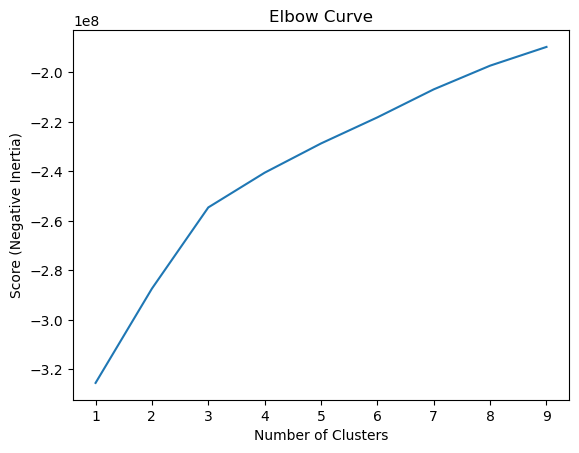

In [19]:
num_cl = range(1, 10)  # Range of potential clusters
kmeans = [KMeans(n_clusters=i, n_init=10, random_state=42) for i in num_cl]  # K-means instances for each cluster number with n_init set to 10
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]  # Score for each instance

# Plot the elbow curve
pl.plot(num_cl, score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score (Negative Inertia)')
pl.title('Elbow Curve')
pl.show()


## Optimal Number of Clusters: 3

We used the elbow method to identify the optimal number of clusters for k-means clustering. The 'elbow point' in the plot, where the reduction in within-cluster variance slows down, suggests 3 as the optimal number of clusters because:

- It provides distinct segmentation of the data.
- It balances detail with computational simplicity.
- It aligns with business needs for manageable and meaningful customer segments.


# 04. k-Means Clustering

In [15]:
# Creating the k-means object with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fitting the k-means object to the data and predict the cluster labels
cluster_labels = kmeans.fit_predict(df_scaled)

# Attaching a new column to the original dataframe with the cluster labels
df['clusters'] = cluster_labels

# Display the first few rows of the dataframe with the cluster labels
df.head()


,order_item_id,price,freight_value,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,clusters
0,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
1,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
2,1.0,29.99,8.72,3149,3149.0,-23.574809,-46.587471,9350.0,2.0,1.0,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
3,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,1.0,1.0,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0
4,1.0,29.99,8.72,3149,3149.0,-23.578333,-46.587123,9350.0,3.0,1.0,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,0


In [16]:
df['clusters'].value_counts()

clusters
0    13528918
1     2780087
2     1770636
Name: count, dtype: int64

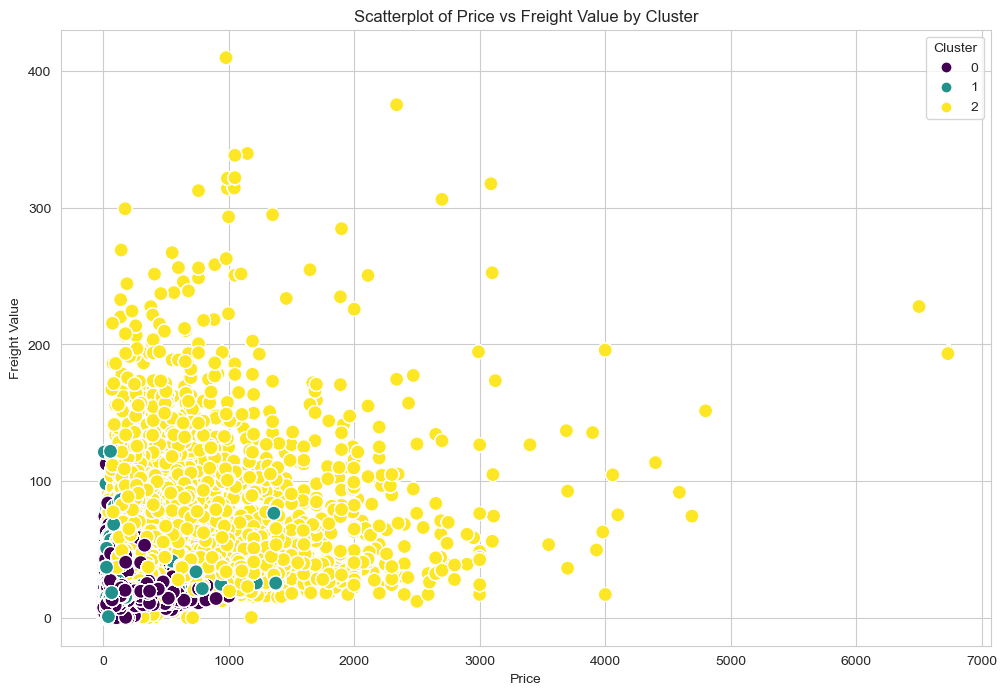

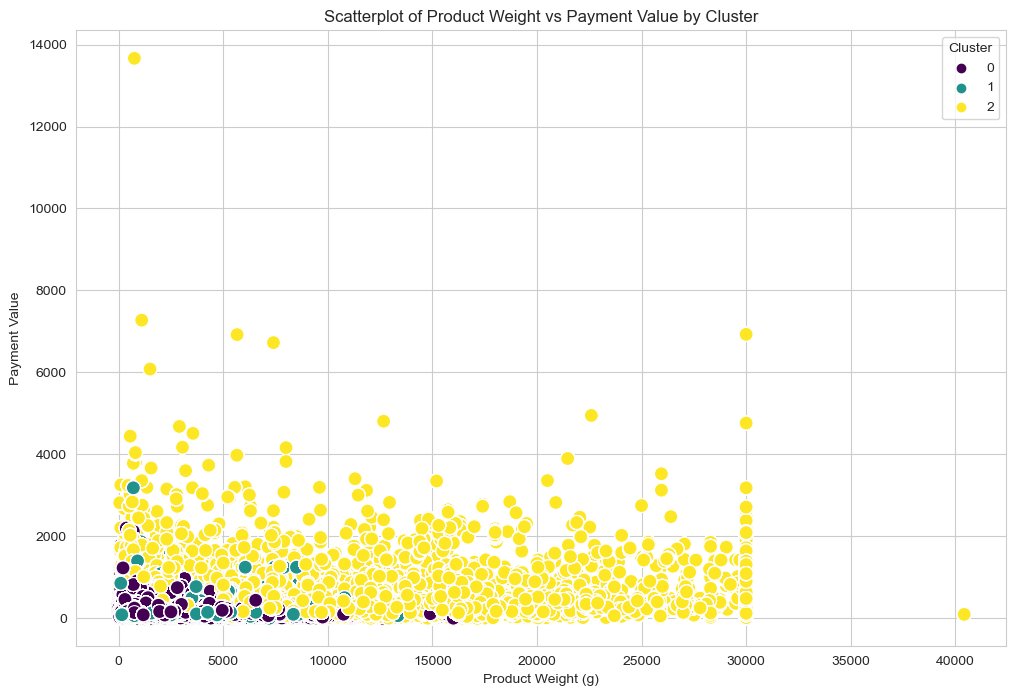

In [20]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# First Visualization: Price vs Freight Value by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='price', y='freight_value', hue='clusters', palette='viridis', s=100)
plt.title('Scatterplot of Price vs Freight Value by Cluster')
plt.xlabel('Price')
plt.ylabel('Freight Value')
plt.legend(title='Cluster')
plt.show()

# Second Visualization: Product Weight vs Payment Value by Cluster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='product_weight_g', y='payment_value', hue='clusters', palette='viridis', s=100)
plt.title('Scatterplot of Product Weight vs Payment Value by Cluster')
plt.xlabel('Product Weight (g)')
plt.ylabel('Payment Value')
plt.legend(title='Cluster')
plt.show()


# Cluster Interpretation on Price vs Freight Value

- Cluster 0 (Purple): Dominated by lower price and freight values, suggesting these may be smaller or more commonly purchased items with lower shipping costs.
- Cluster 1 (Green): Represents a middle range of price and freight values, likely indicating products that balance size, weight, and cost, potentially offering a moderate frequency of purchase and profit margin.
- Cluster 2 (Yellow): Characterized by a broad spread in both price and shipping costs, indicating a diverse product range. High freight costs here could point to bulky or heavy items, or those requiring special handling, rather than just high-priced items.

These clusters are a starting point for understanding product and shipping cost relationships. However, for actionable insights, we need to dive deeper into product specifics, customer behavior, and shipping logistics.


# Cluster Interpretation on Product Weight vs Payment Value

- Cluster 0 (Purple): This cluster is tightly packed at the lower end of both axes, suggesting these are items that are lighter and less costly. They likely represent standard, possibly everyday products that don't require significant expenditure from customers.

- Cluster 1 (Green): Sparse and slightly higher on the payment value axis, this cluster could represent a niche category of products that, while not significantly heavier, command a higher price, possibly due to their quality or brand value.

- Cluster 2 (Yellow): Predominantly distributed across the entire range of the product weight axis but not extensively high on the payment value axis, indicating a variety of products with varying weights but generally not the most expensive. This might include bulk purchases or items with variable weights that don't drastically increase in price.



In [17]:
df.loc[df['clusters'] == 2, 'cluster'] = 'Yellow'
df.loc[df['clusters'] == 1, 'cluster'] = 'Green'
df.loc[df['clusters'] == 0, 'cluster'] = 'Purple'

In [18]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'freight_value':['mean', 'median'], 
                         'product_weight_g':['mean', 'median'],
                          'payment_value':['mean', 'median']})

price         freight_value        product_weight_g          \
               mean  median          mean median             mean  median   
cluster                                                                     
Green    103.135811   70.00     19.575549  17.66      1455.495855   650.0   
Purple    91.969866   66.99     16.175336  15.31      1171.394063   600.0   
Yellow   373.566406  203.99     45.735387  36.85     10635.117870  9750.0   

        payment_value          
                 mean  median  
cluster                        
Green      158.680918  113.03  
Purple     132.579194   98.22  
Yellow     520.602090  305.34

#### Green Cluster: Mid-range prices and freight values, moderate product weight, and a mix of payment values suggesting a variety of mid-priced products.

#### Purple Cluster: Slightly lower prices and freight values, lighter products, and smaller payment values indicating more budget-friendly items.

#### Yellow Cluster: Much higher prices and freight costs, heavy product weight, and the largest payment values, likely representing premium items.

#### These statistics provide valuable insights into the characteristics of each cluster and can inform strategic decisions such as pricing strategies, shipping policies, inventory management, and targeted marketing campaigns.